### Business Overview:
The project analyzes order level data of a fashion E-commerce platform to understand business sales and revenue performance, customer demand pattern and draw insights that can improve business activities.
The objective of the analysis is to understand high performing categories, analyze revenue and order volume trends over time, understand geographical demand distribution and use data driven insights to plan inventory, marketing and logistic aspects of running the business

In [151]:
import pandas as pd

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [153]:
import matplotlib.ticker as mtick

In [154]:
df=pd.read_csv("Amazon Sale Report.csv")

C:\Users\Adnan Khader\AppData\Local\Temp\ipykernel_24076\1760764839.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Amazon Sale Report.csv")


In [155]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [156]:
df.shape

(128975, 24)

In [157]:
pd.set_option('display.max.columns',24)

In [158]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [160]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [161]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [162]:
df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [163]:
df['Sales Channel '].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [164]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [165]:
df['ship-country'].unique()

array(['IN', nan], dtype=object)

In [166]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [167]:
df['B2B'].dtype

dtype('bool')

In [168]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [169]:
cdf=df.drop("Unnamed: 22",axis=1)

In [170]:
cdf.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [171]:
cdf.drop("ship-country",axis=1,inplace=True)
cdf.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'promotion-ids', 'B2B',
       'fulfilled-by'],
      dtype='object')

In [172]:
cdf.drop("currency",axis=1,inplace=True)
cdf.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'promotion-ids', 'B2B', 'fulfilled-by'],
      dtype='object')

In [173]:
cdf.drop('promotion-ids',axis=1,inplace=True)
cdf.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B', 'fulfilled-by'],
      dtype='object')

In [174]:
 cdf.columns= (
    cdf.columns
      .str.strip()              # remove leading/trailing spaces
      .str.lower()              # convert to lowercase
      .str.replace(' ', '_')    # replace spaces with underscore
      .str.replace('-', '_')    # replace hyphens with underscore
)
cdf.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'qty', 'amount', 'ship_city', 'ship_state',
       'ship_postal_code', 'b2b', 'fulfilled_by'],
      dtype='object')

In [175]:
cdf.dtypes

index                   int64
order_id               object
date                   object
status                 object
fulfilment             object
sales_channel          object
ship_service_level     object
style                  object
sku                    object
category               object
size                   object
asin                   object
courier_status         object
qty                     int64
amount                float64
ship_city              object
ship_state             object
ship_postal_code      float64
b2b                      bool
fulfilled_by           object
dtype: object

In [176]:
cdf['date'].head()

0    04-30-22
1    04-30-22
2    04-30-22
3    04-30-22
4    04-30-22
Name: date, dtype: object

In [177]:
cdf['date'] = pd.to_datetime(cdf['date'], errors='coerce')


In [178]:
cdf.dtypes

index                          int64
order_id                      object
date                  datetime64[ns]
status                        object
fulfilment                    object
sales_channel                 object
ship_service_level            object
style                         object
sku                           object
category                      object
size                          object
asin                          object
courier_status                object
qty                            int64
amount                       float64
ship_city                     object
ship_state                    object
ship_postal_code             float64
b2b                             bool
fulfilled_by                  object
dtype: object

In [179]:
cdf.isnull().sum()

index                     0
order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel             0
ship_service_level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier_status         6872
qty                       0
amount                 7795
ship_city                33
ship_state               33
ship_postal_code         33
b2b                       0
fulfilled_by          89698
dtype: int64

In [180]:
cdf['courier_status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [181]:
cdf['courier_status'] = cdf['courier_status'].fillna('Not Shipped')
cdf['courier_status'].unique()

array(['Not Shipped', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

Excluding Amount so revenue calculation is not distorted

In [182]:
cdf[['ship_city', 'ship_state', 'ship_postal_code']] = (
    cdf[['ship_city', 'ship_state', 'ship_postal_code']]
    .fillna('Unknown')
)

cdf[['ship_city','ship_state','ship_postal_code']]=cdf[['ship_city','ship_state','ship_postal_code']].fillna('unknown')

In [183]:
cdf.drop("index",axis=1,inplace=True)

In [184]:
cdf.drop("fulfilled_by",axis=1,inplace=True)

In [185]:
cdf.loc[cdf['status'].isin(['Cancelled', 'Returned']), 'amount'] = 0


In [186]:
cdf.shape

(128975, 18)

In [187]:
cdf.duplicated().sum()


6

In transactional data, Order ID should be unique.

In [188]:
cdf = cdf.drop_duplicates()
cdf.duplicated().sum()

0

In [189]:
cdf['order_id'].duplicated().sum()

8591

In [190]:
cdf[cdf['order_id'].duplicated(keep=False)].sort_values('order_id').head()


,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,size,asin,courier_status,qty,amount,ship_city,ship_state,ship_postal_code,b2b
78939,171-0012693-2893106,2022-05-07,Cancelled,Merchant,Amazon.in,Standard,NW015,NW015-TP-PJ-S,Set,S,B0922SCDFN,Not Shipped,0,0.0,SRI GANGANAGAR,RAJASTHAN,335001.0,False
78938,171-0012693-2893106,2022-05-07,Cancelled,Merchant,Amazon.in,Standard,NW030,NW030-TP-PJ-S,Set,S,B09G2RFP14,Not Shipped,0,0.0,SRI GANGANAGAR,RAJASTHAN,335001.0,False
91476,171-0014231-7760344,2022-06-29,Pending,Amazon,Amazon.in,Expedited,J0224,J0224-SKD-XS,Set,XS,B09RKFBZZD,Unshipped,1,1364.0,AHMEDABAD,Gujarat,380015.0,False
91475,171-0014231-7760344,2022-06-29,Pending,Amazon,Amazon.in,Expedited,SET342,SET342-KR-NP-N-XS,Set,XS,B09Q1943PQ,Shipped,1,850.0,AHMEDABAD,Gujarat,380015.0,False
24516,171-0015435-1981904,2022-04-16,Shipped,Amazon,Amazon.in,Expedited,JNE3794,JNE3794-KR-L,kurta,L,B09HMSSM5B,Shipped,1,517.0,Pimpri Chinchwad,MAHARASHTRA,412101.0,False


This means one order containing different products is kept in differnet records

In [191]:
cdf['order_year'] = cdf['date'].dt.year
cdf['order_month'] = cdf['date'].dt.month
cdf['order_month_name'] = cdf['date'].dt.month_name()
cdf['order_day'] = cdf['date'].dt.day
cdf['order_day_name'] = cdf['date'].dt.day_name()


In [192]:
cdf.head()

,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,size,asin,courier_status,qty,amount,ship_city,ship_state,ship_postal_code,b2b,order_year,order_month,order_month_name,order_day,order_day_name
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Not Shipped,0,0.0,MUMBAI,MAHARASHTRA,400081.0,False,2022,4,April,30,Saturday
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,False,2022,4,April,30,Saturday
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,True,2022,4,April,30,Saturday
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Not Shipped,0,0.0,PUDUCHERRY,PUDUCHERRY,605008.0,False,2022,4,April,30,Saturday
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,False,2022,4,April,30,Saturday


In [193]:
cdf.columns

Index(['order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'qty', 'amount', 'ship_city', 'ship_state',
       'ship_postal_code', 'b2b', 'order_year', 'order_month',
       'order_month_name', 'order_day', 'order_day_name'],
      dtype='object')

In [194]:
cdf['status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [195]:
def simplify_status(x):
    x = str(x).lower()
    
    if 'cancel' in x:
        return 'Cancelled'
    elif 'return' in x or 'rejected' in x or 'damaged' in x or 'lost' in x:
        return 'Returned / Failed'
    elif 'delivered' in x:
        return 'Delivered'
    elif 'shipped' in x or 'shipping' in x:
        return 'In Transit'
    elif 'pending' in x:
        return 'Pending'
    else:
        return 'Other'
        
cdf['order_status_group'] = cdf['status'].apply(simplify_status)


In [196]:
cdf['order_status_group'].unique()

array(['Cancelled', 'Delivered', 'In Transit', 'Returned / Failed',
       'Pending'], dtype=object)

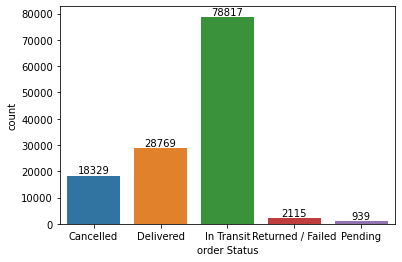

In [197]:
ax=sns.countplot(x='order_status_group', data=cdf)
plt.xlabel("order Status")
for b in ax.containers:
    ax.bar_label(b)

### Inference
- Majority of the orders are in Transit
- Delivered orders are much less than in-transit orders indicating slow logistic operations
- A noticeable number of Cancelled Orders may be due to slow deliveries/operational delays

In [198]:
cat=cdf["category"].value_counts()

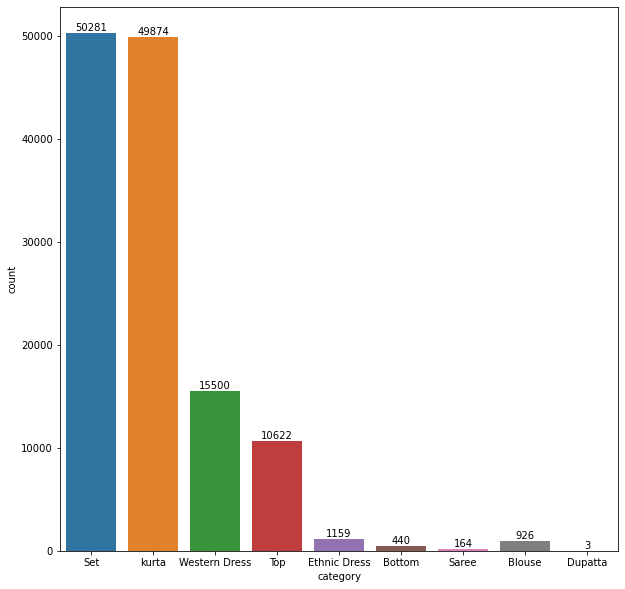

In [199]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='category',data=cdf)
for b in ax.containers:
    ax.bar_label(b)

### Inference
- Kurta and set dominate the fashion category
- Western and Top form a secondary market
- Ethnic Dresses, Bottoms, Sarees, Blouses and Dupattas have very low sales indicating niche or limited assortment of products
- The category distribution is highly skewed indicating over dependence on a few categories

Text(0.5, 1.0, 'Share of Top 5 Categories')

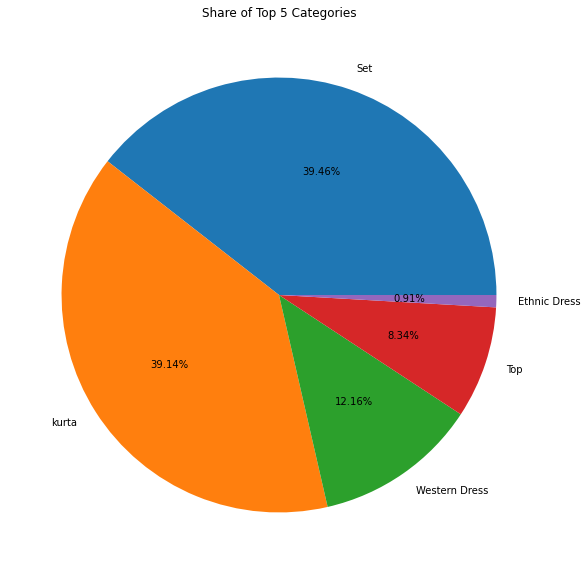

In [200]:
plt.figure(figsize=(10,10))
category=cdf['category'].value_counts().sort_values(ascending=False)[0:5]
plt.pie(x=category.values,labels=category.index,autopct="%1.2f%%")
plt.title("Share of Top 5 Categories")
                    

### Inference
- Kurta and Set contribute to nearly 80% share implying heavy dependence on traditional wear and two piece sets
- Western Dresses have a ~12% share showing a relatively smaller but noticeable market for western clothes
- Top,Ethnic wear and Western Dress form a secondary market

<AxesSubplot:xlabel='size', ylabel='count'>

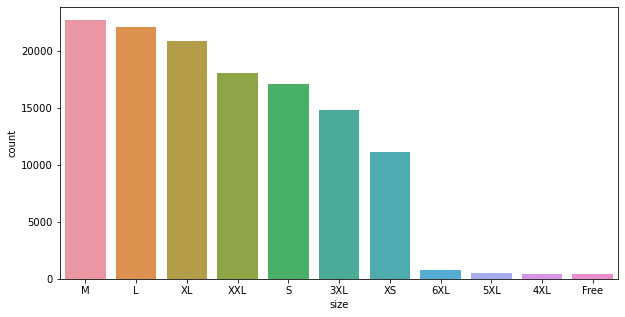

In [201]:
plt.figure(figsize=(10, 5))
sns.countplot(x='size',data=cdf,order=cdf['size'].value_counts().index)


### Inference
- Medium and Large size have the highest demand
- There is also noticeable demand for XL,XXL,S,3XL and XS
- The distribution is skewed towards the left which may guide in inventory planning for the sellers

In [202]:

cdf['B2B/D2C'] = cdf['b2b'].apply(lambda x: 'B2B' if x else 'D2C')


Text(0.5, 1.0, 'B2B vs D2C Orders')

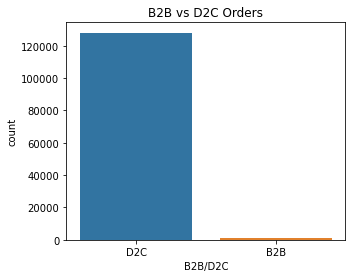

In [203]:
plt.figure(figsize=(5, 4))
sns.countplot(x='B2B/D2C', data=cdf)
plt.title('B2B vs D2C Orders')


### Inference
- The business is focused mostly on Direct to Customer (D2C) rather than Business to Business(B2B)

(0.0, 2000.0)

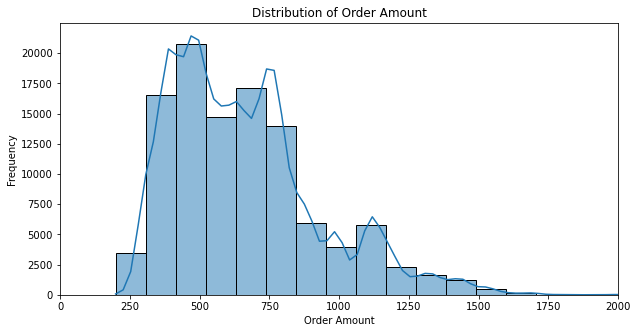

In [204]:
plt.figure(figsize=(10, 5))
sns.histplot(cdf[cdf['amount']>0]['amount'],bins=50,kde=True)
plt.title('Distribution of Order Amount')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')
plt.xlim(0,2000)

In [205]:
cdf['amount'].describe()

count    128740.000000
mean        556.709329
std         346.752340
min           0.000000
25%         376.000000
50%         545.000000
75%         761.000000
max        5584.000000
Name: amount, dtype: float64

### Inference
- Majority of orders are in the range ₹300-₹900 peaking at around mid-range order values ₹400–₹600 indicateing the most common purchase basket size.
- The average order value is ~₹560 
- The high order values above ₹1200 are rare indicating a price sensitive market audience
- Revenue could be driven by more focus in the price range of ₹300-₹900

Text(0, 0.5, 'Orders volume')

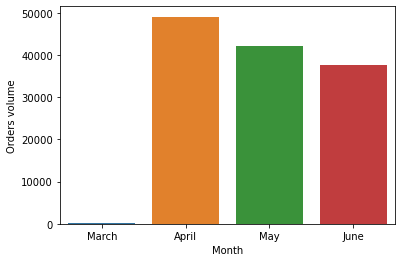

In [206]:
sort_bymonth=cdf.groupby(["order_month_name",'order_month'])['order_id'].count().reset_index().sort_values('order_month')
sns.barplot(x="order_month_name",y='order_id',data=sort_bymonth)
plt.xlabel("Month")
plt.ylabel("Orders volume")

### Inference
- March has negligible sales volume probably due to data unavailability
- April saw the highest business indicating peak business season
- Order volume fell gradually from april to june 
- Yet both may and june maintained strong activity despite decline


Text(0.5, 1.0, 'Top 5 States based on Order Volume')

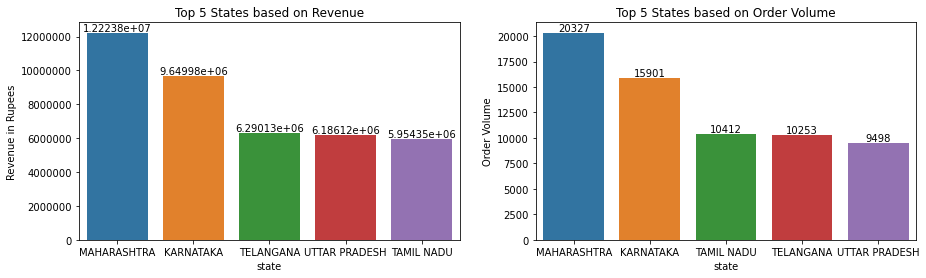

In [207]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

state_rev=cdf.groupby(by='ship_state')['amount'].sum().sort_values(ascending=False).head(5)

con=sns.barplot(x=state_rev.index,y=state_rev.values,ax=ax[0])
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_ylabel("Revenue in Rupees")
ax[0].set_xlabel("state")
ax[0].set_title("Top 5 States based on Revenue")
for b in con.containers:
    con.bar_label(b)
state_qty=cdf.groupby(by='ship_state')['qty'].sum().sort_values(ascending=False).head(5)

c=sns.barplot(x=state_qty.index,y=state_qty.values,ax=ax[1])
for b in c.containers:
    c.bar_label(b)
ax[1].set_ylabel("Order Volume")
ax[1].set_xlabel("state")
ax[1].set_title("Top 5 States based on Order Volume")

### Inference
-Maharashtra and Karnantaka account for major chunk of orders and Revenue
-Tamil Nadu,Telangana and Uttar Pradesh form a secondary market
-Expanding reach in low performing states could help in imoproving revenue 

Text(0.5, 1.0, 'Top 5 cities based on Order Volume')

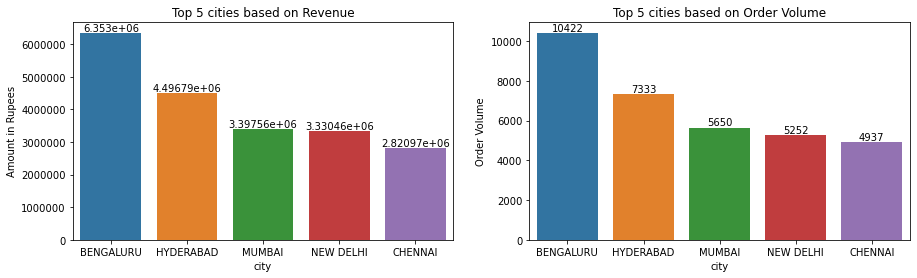

In [208]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

city_rev=cdf.groupby(by='ship_city')['amount'].sum().sort_values(ascending=False).head(5)

con=sns.barplot(x=city_rev.index,y=city_rev.values,ax=ax[0])
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_ylabel("Amount in Rupees")
ax[0].set_xlabel("city")
ax[0].set_title("Top 5 cities based on Revenue")


for b in con.containers:
    con.bar_label(b)
city_qty=cdf.groupby(by='ship_city')['qty'].sum().sort_values(ascending=False).head(5)

c=sns.barplot(x=city_qty.index,y=city_qty.values,ax=ax[1])
for b in c.containers:
    c.bar_label(b)
ax[1].set_ylabel("Order Volume")
ax[1].set_xlabel("city")
ax[1].set_title("Top 5 cities based on Order Volume")

### Inference
- Bengaluru is the top performing state acting as the key revenue driver
- Followed by Hyderabad which shows strong demand
- Mumbai, New Delhi, and Chennai form a solid mid-tier with comparable order volumes.
- Majority orders are from urban cities, the audience expect faster delivery and logistical issues could make a dent in the revenue

Text(0, 0.5, 'Order Volume')

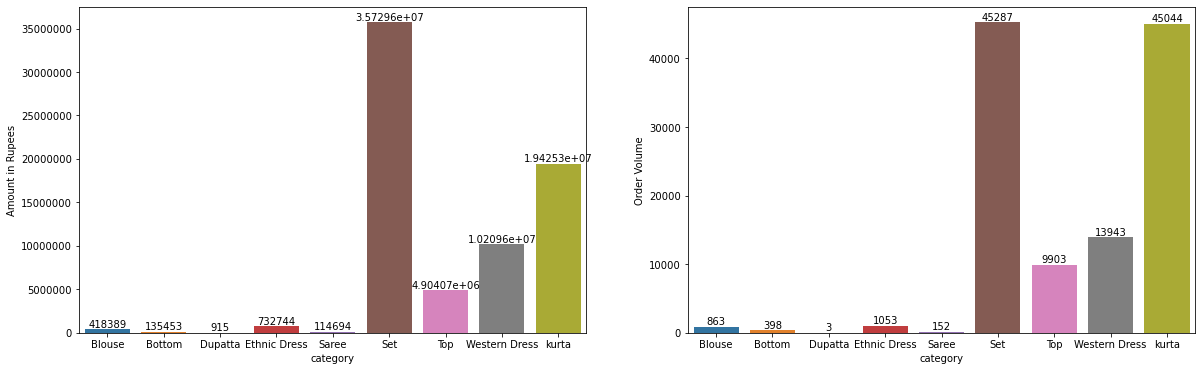

In [209]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

cat_rev=cdf.groupby(by='category')['amount'].sum()

con=sns.barplot(x=cat_rev.index,y=cat_rev.values,ax=ax[0])
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_ylabel("Amount in Rupees")

for b in con.containers:
    con.bar_label(b)
cat_qty=cdf.groupby(by='category')['qty'].sum()

c=sns.barplot(x=cat_qty.index,y=cat_qty.values,ax=ax[1])
for b in c.containers:
    c.bar_label(b)
ax[1].set_ylabel("Order Volume")

### Inference
- Set categroy dominates both revenue and order volume,making it key driver of the business
- Though order volume of Kurtas matches set, the revenue generated from less than Set suggesting lower unit prices but strong demand
- Western Dresses and Tops contribute meaningfully to both volume and revenue acting as important secondary categories
- Low-volume categories - Blouse, Bottom, Dupatta, Saree contribute minimally to the business-


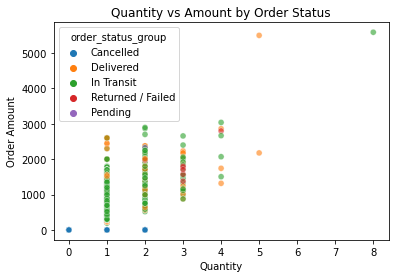

In [210]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='qty',
    y='amount',
    hue='order_status_group',
    data=cdf,
    alpha=0.6
)

plt.title('Quantity vs Amount by Order Status')
plt.xlabel('Quantity')
plt.ylabel('Order Amount')
plt.show()


### Inference
- Higher Quantity orders are rare
- Customers usually order 1 or 2 quantity

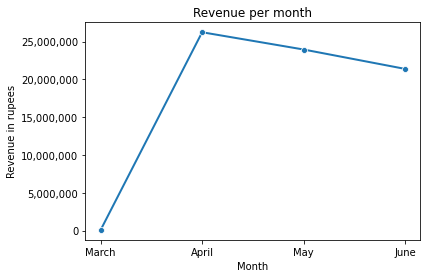

In [211]:
monthly_revenue=cdf.groupby(['order_month', 'order_month_name'])['amount'].sum().reset_index().sort_values('order_month')

ax = sns.lineplot(
    x='order_month_name',
    y='amount',
    data=monthly_revenue,
    marker='o',
    linewidth=2
)
ax.set_xlabel("Month")
ax.set_ylabel("Revenue in rupees")
ax.set_title("Revenue per month")

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

### Inference
- April witnessed peak business
- Business dropped gradually yet May and June maintained strong revenue levels
- March had negligible sales

Text(69.0, 0.5, 'Order Days')

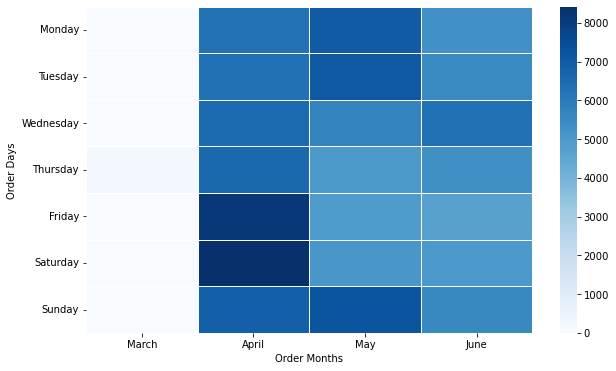

In [212]:
heatmap_data = cdf.pivot_table(
    index='order_day_name',
    columns='order_month_name',
    values='order_id',
    aggfunc='count'
)
day_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

month_order = ['March', 'April','May', 'June']
    


heatmap_data = heatmap_data.reindex(index=day_order, columns=month_order)
heatmap_data.fillna(value=0,inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    cmap='Blues',
    linewidths=0.5
)
plt.xlabel("Order Months")
plt.ylabel("Order Days")

### Inference
- Order Volume peaks in april consistenly on all days of the week
- Weekend offers increased sales activity particularly sunday 
- Mid week days - Tuesday,Wednesday and Thursday have relatively lower sales indicating the need to offer promotions to improve sales on these days

### Key Insights 
- Demand is highly skewed in a few categories - Kurta and Set which contribute to majority of orders and revenue
- April emerges as peak business month followed by gradual but steady decline in business
- Metro Cities - Mumbai, Bengaluru, Chennai , Hyderabad and New Delhi contribute to majortiy demand
- Weekend sees a peak in sales and mid days of the week offer low business activity
- Majority of orders are in transit


### Recommendations

- Focus on Logistic issues to improve delivery time
- Prioritize inventory planning for higher sales cateories that is Kurta and Set
- Explore opportunities in lower selling categories like western wear
- Improve marketing and promotion activities in Metro Cities
